In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

In [2]:
## This is an auxiliary function to keep the code in notebook clean later.
## Comment out unneccessary plots.
function dispall(mat::Array{Float64},alpha)

 #----VIEW FSEP     
        figure()
    plot(mat[:,9],label="f0sep")
    plot(mat[:,10],label="fsep")
    xlabel("Timestep no.")
    ylabel("Separation point position")
    legend()
    annot = "$alpha deg"
                annotate(annot,
                xy=[1;0],
                xycoords="axes fraction",
                xytext=[-200,10],
                textcoords="offset points",
                fontsize=13.0,
                ha="right",
                va="bottom")

#----VIEW SPEEDS DUE TO CAMBER AND THICKNESS  
        figure()
    plot(mat[:,14],label="q1t")
    plot(mat[:,15],label="q1c")
    xlabel("Timestep no.")
    ylabel("Velocity")
    legend()
    annot = "$alpha deg"
                annotate(annot,
                xy=[1;0],
                xycoords="axes fraction",
                xytext=[-200,10],
                textcoords="offset points",
                fontsize=13.0,
                ha="right",
                va="bottom")
    
#----VIEW LIFT COEFFICIENT  
        figure()
    plot(mat[:,6])
    ylabel("Lift coefficient CL")
    xlabel("Timestep No.")
        if(maximum(mat[:,6][1]>2.0))
           ylim(0.,2.)
        end
    annot = "$alpha deg"
                annotate(annot,
                xy=[1;0],
                xycoords="axes fraction",
                xytext=[-200,10],
                textcoords="offset points",
                fontsize=13.0,
                ha="right",
                va="bottom")     
    
#----VIEW DRAG COEFFICIENT      
        figure()
    plot(mat[:,7])
    ylabel("Drag coefficient CD")
    xlabel("Timestep No.")
        if(maximum(mat[:,7][1]>0.5))
           ylim(0.,0.5)
        end
    annot = "$alpha deg"
                annotate(annot,
                xy=[1;0],
                xycoords="axes fraction",
                xytext=[-200,10],
                textcoords="offset points",
                fontsize=13.0,
                ha="right",
                va="bottom")   
    
#----VIEW MOMENT COEFFICIENT     
        figure()
    plot(mat[:,8])
    ylabel("Moment coefficient CM")
    xlabel("Timestep No.")
        if(minimum(mat[:,8][1]<-0.5))
           ylim(-0.5,0.)
        end    
    annot = "$alpha deg"
                annotate(annot,
                xy=[1;0],
                xycoords="axes fraction",
                xytext=[-200,10],
                textcoords="offset points",
                fontsize=13.0,
                ha="right",
                va="bottom")
end

dispall (generic function with 1 method)

In [3]:
sepdef = SeparationParams(16.2,1.52,3.21,"Sheng")
alpha = [0.0, 9.0, 15.0, 3.0, 6.0, 12.0, 16.0, 17.0]

    pvt = 0.25 #Leading edge
    lespcrit = [5;] #Note that the value is entered as an array. 
    nsteps = 400
    #nsteps=700

400

In [4]:
for case = 1 : length(alpha)
  
    alphadef = ConstDef(alpha[case].*pi/180)
    hdef = ConstDef(0.)
    udef = ConstDef(1.) #Freestream velocity is a constant. Set as constant = 1

    #The full kinematics are collected as:
    full_kinem = KinemDef(alphadef, hdef, udef)

    # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
    #in the same folder. For eg. "sd7003.dat". 
    #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
    surf = TwoDSurf("n0012.dat", pvt, full_kinem,lespcrit)
    curfield = TwoDFlowField()

    #Now the code is run as :
    #The variables mat, surf and curfield are returned

    @time mat,surf, curfield = ldvm_spv(surf, curfield,sepdef, nsteps);

    str = Int(alpha[case])
    str = "$str"
    str = string("3_3_alpha_",str,".dat")
    writedlm(str,mat)
end

 74.952442 seconds (1.22 M allocations: 197.165 MB, 0.90% gc time)
 92.678766 seconds (718.69 k allocations: 185.731 MB, 0.26% gc time)
 56.334154 seconds (574.09 k allocations: 146.518 MB, 0.10% gc time)
 74.723981 seconds (652.84 k allocations: 175.901 MB, 0.11% gc time)
 78.748073 seconds (630.02 k allocations: 172.519 MB, 0.12% gc time)
 60.587442 seconds (708.25 k allocations: 182.800 MB, 0.14% gc time)
 38.009872 seconds (558.12 k allocations: 141.958 MB, 0.11% gc time)
 35.222872 seconds (522.84 k allocations: 132.911 MB, 0.12% gc time)


In [5]:
data = zeros(nsteps,15,length(alpha))
for case = 1:length(alpha)
    str = Int(alpha[case])
    str = "$str"
    str = string("3_3_alpha_",str,".dat")   
    data[:,:,case] = readdlm(str)
end

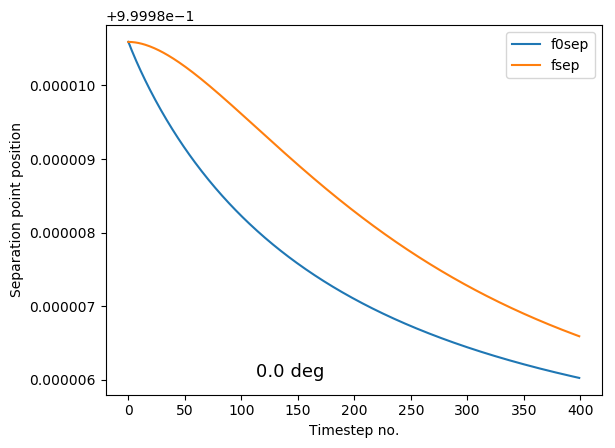

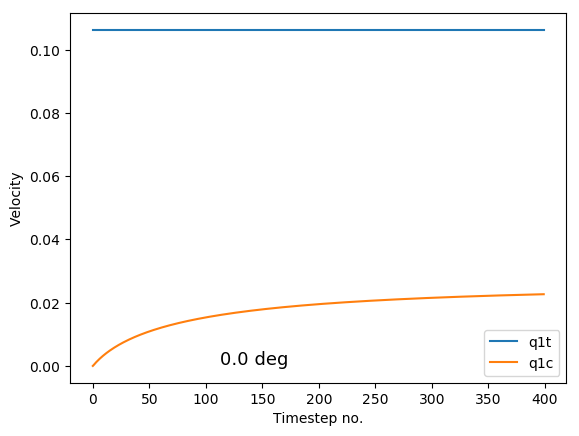

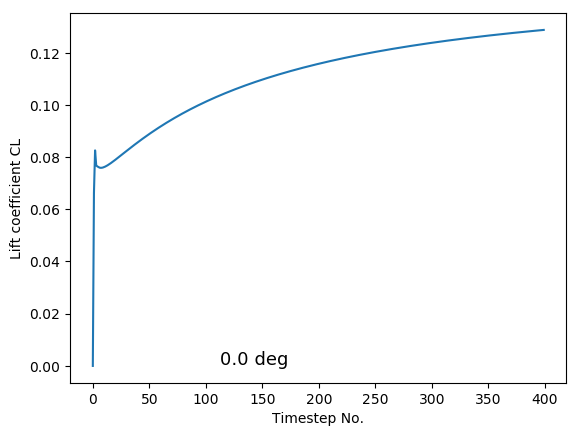

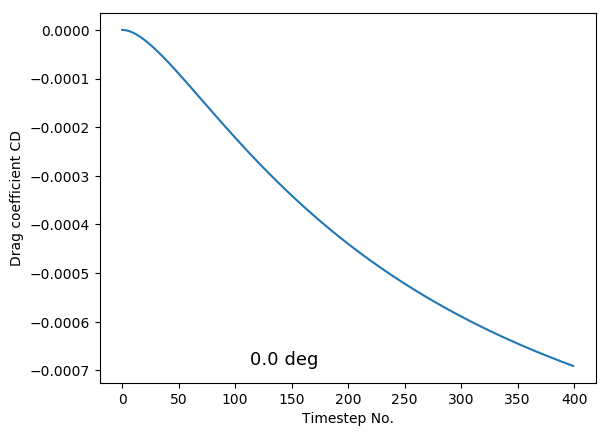

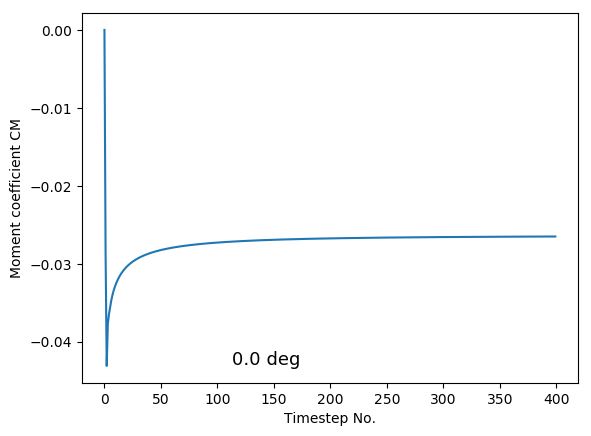

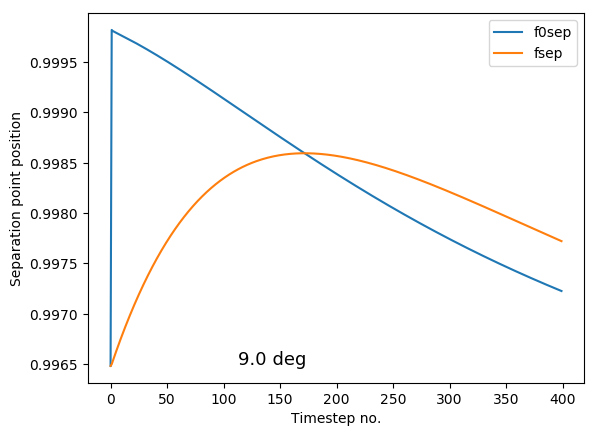

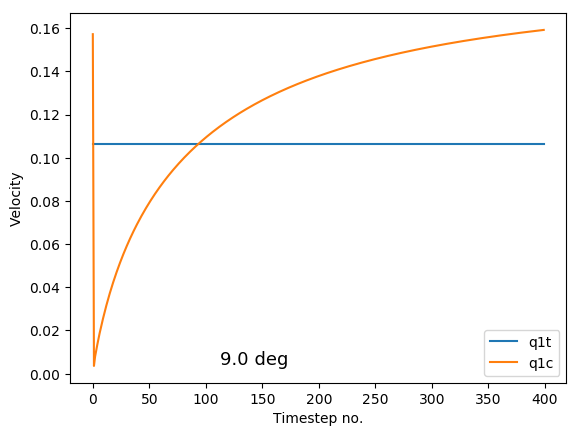

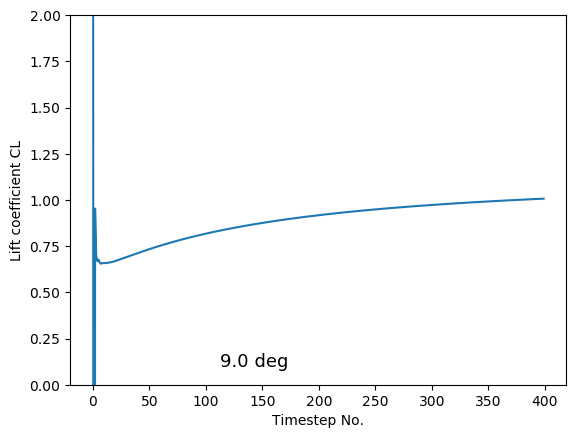

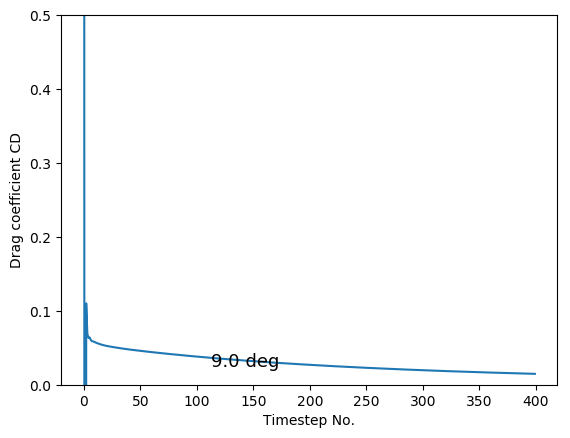

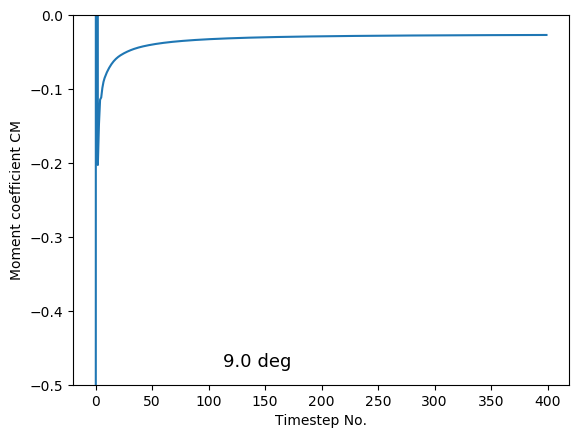

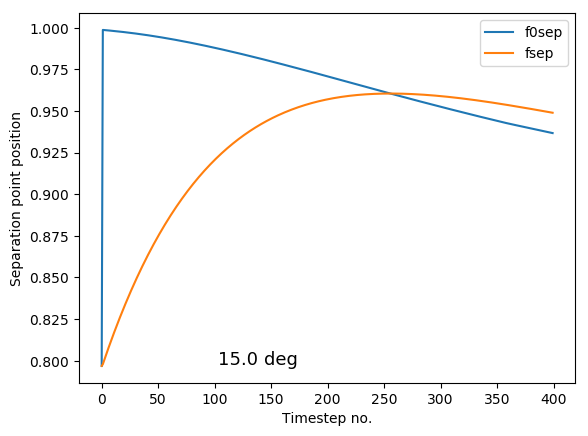

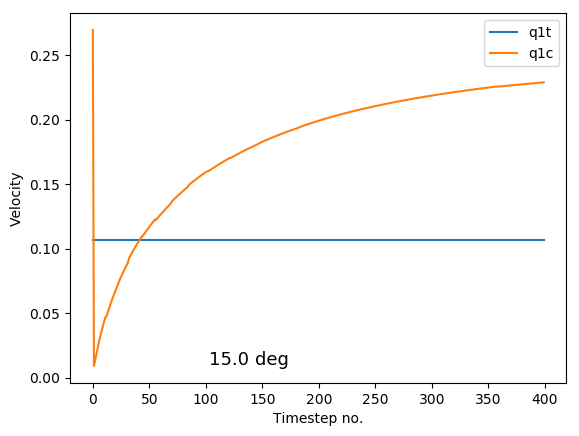

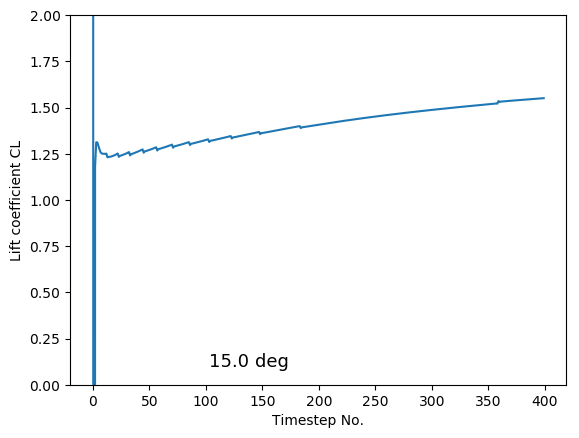

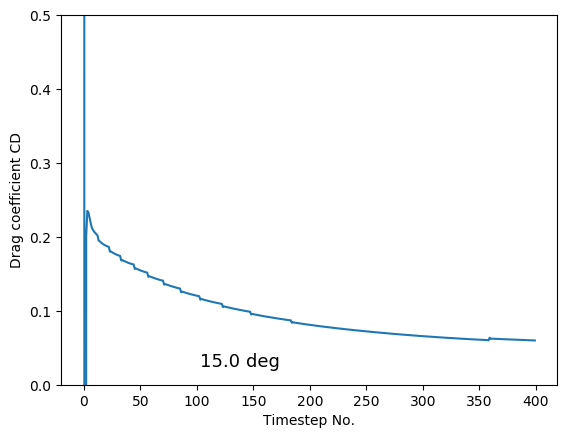

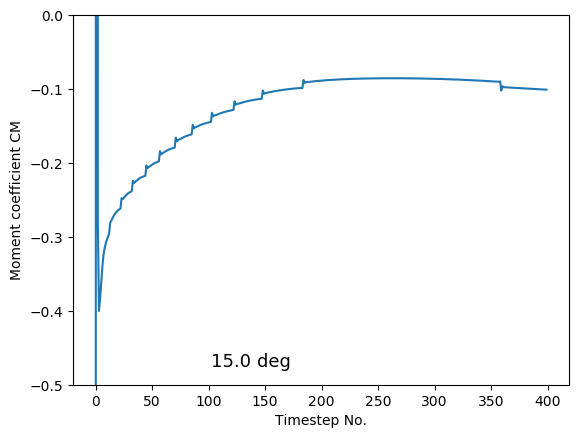

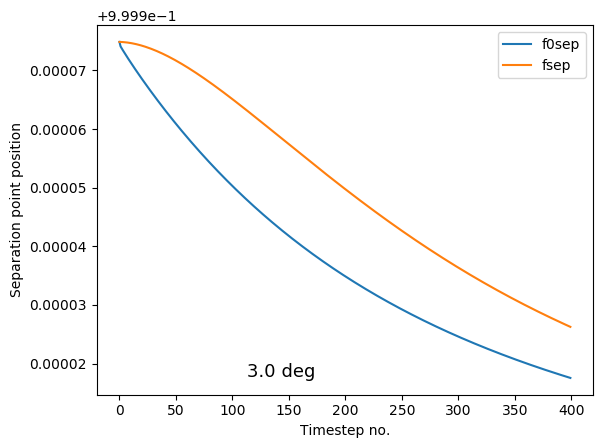

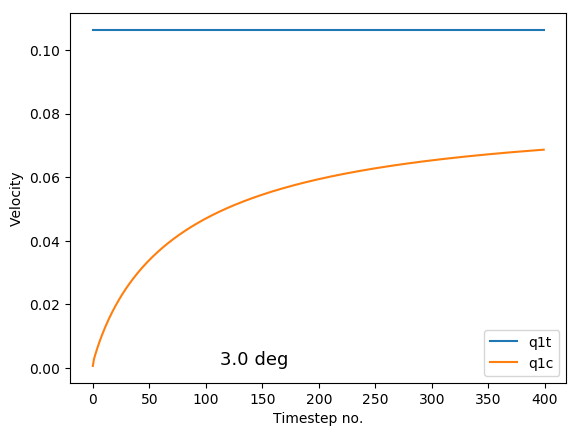

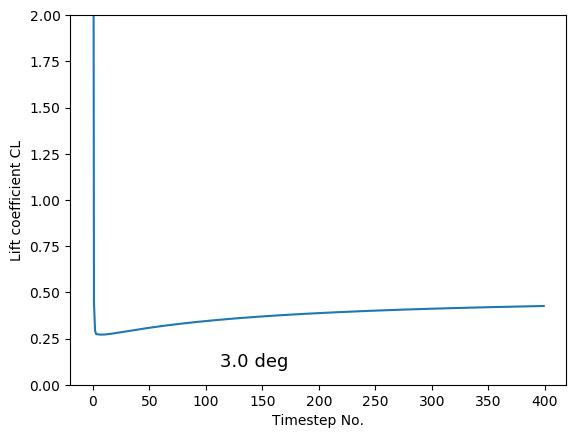

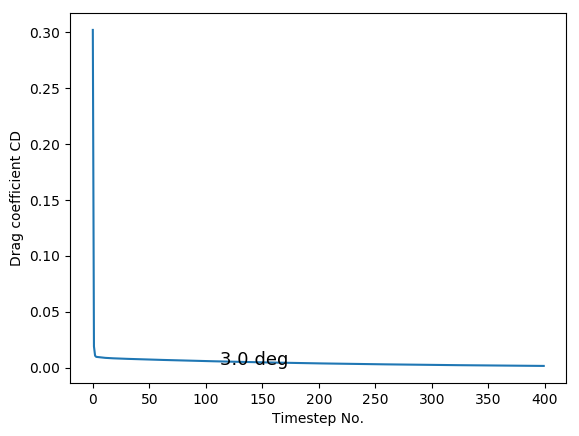

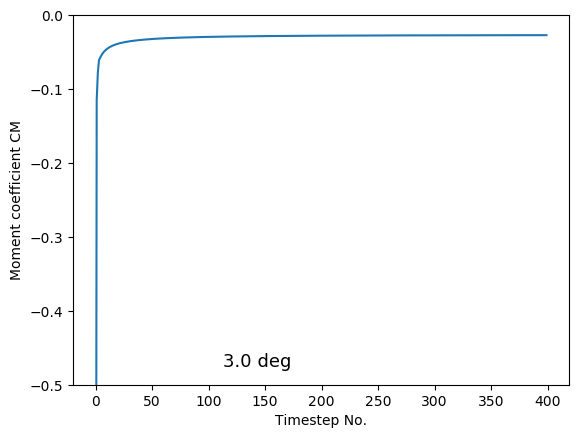

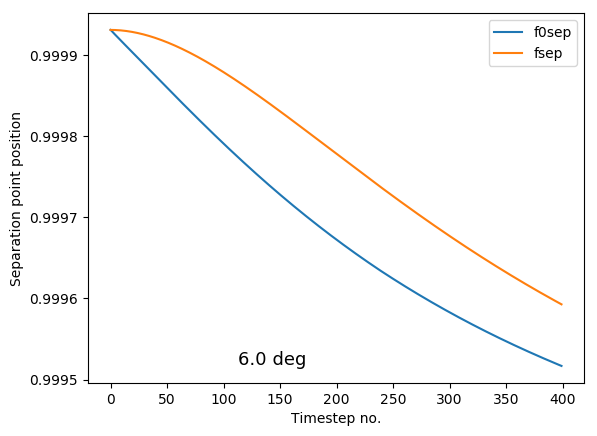

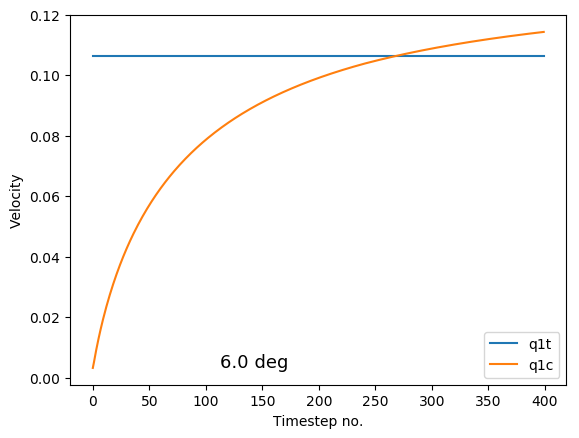

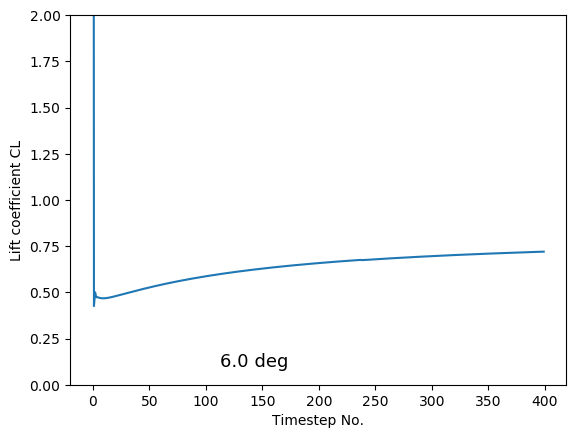

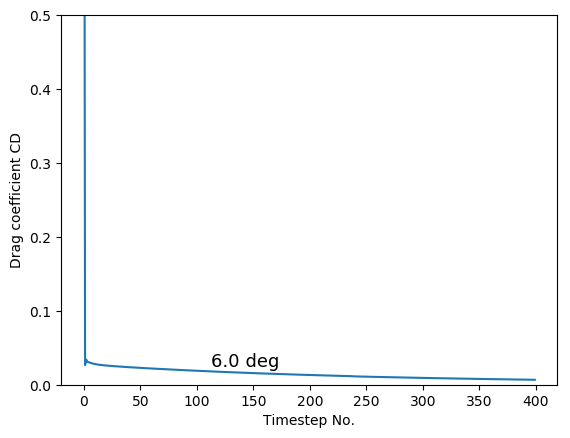

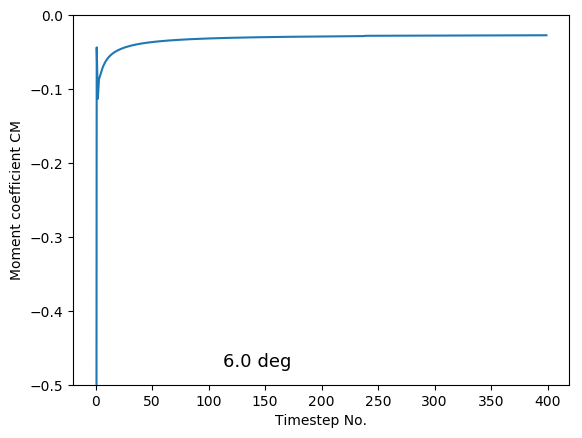

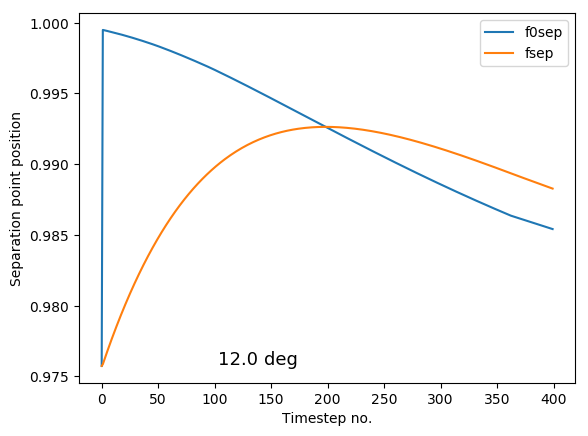

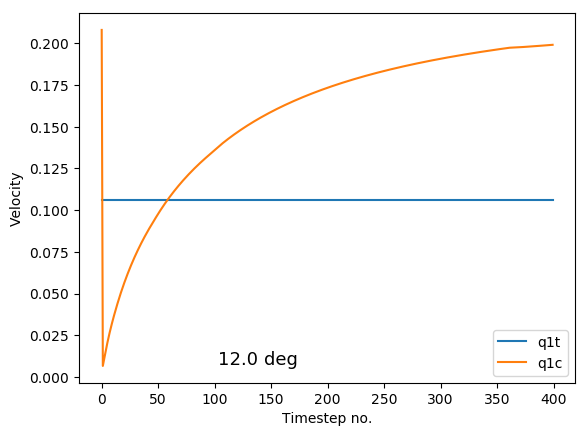

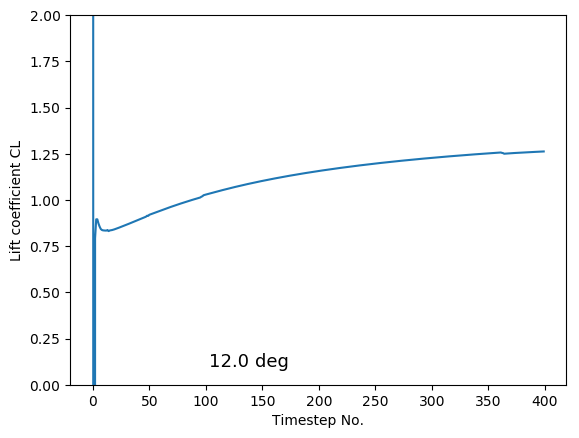

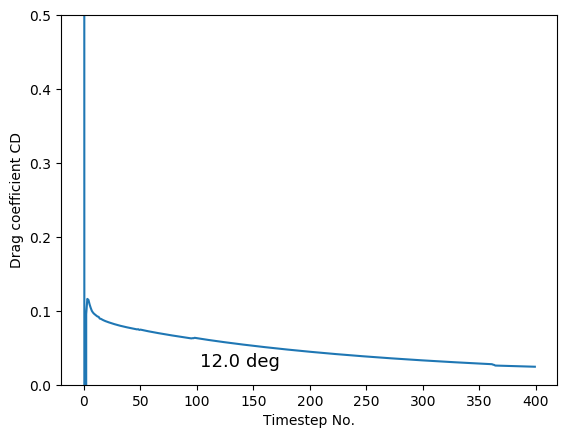

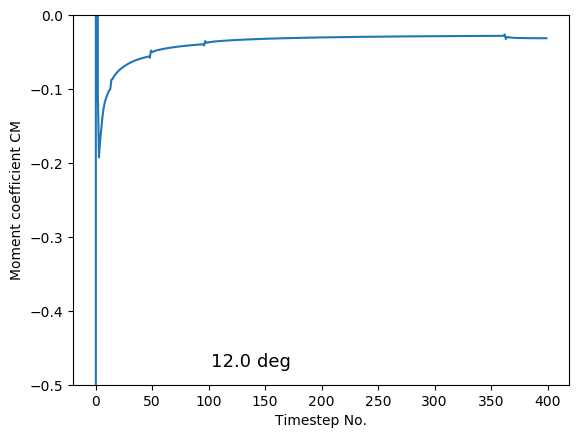

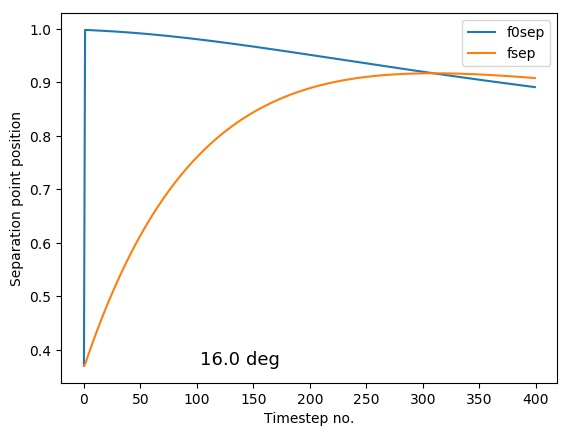

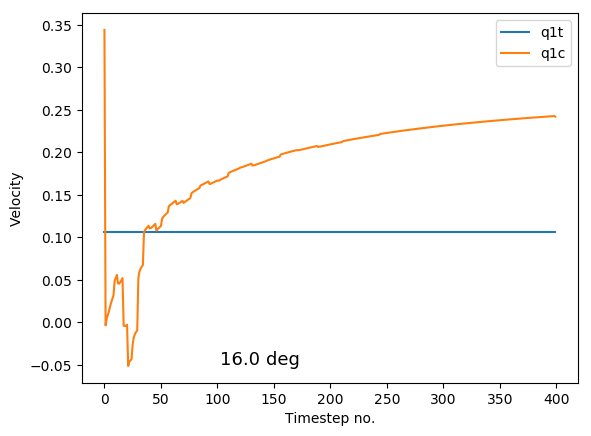

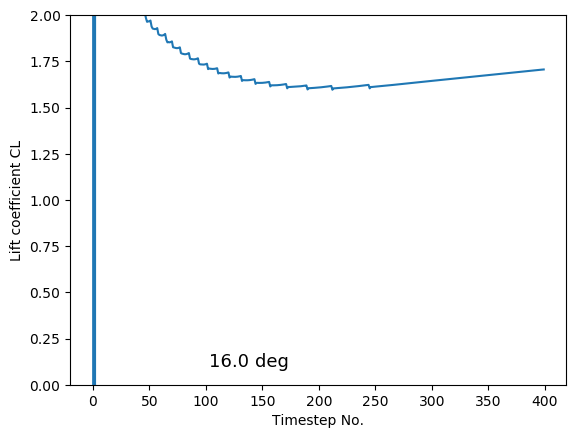

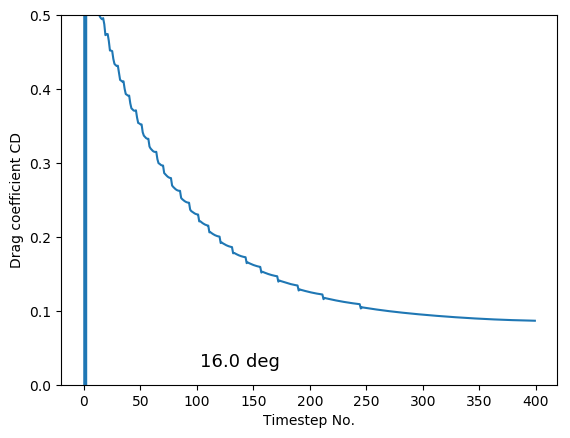

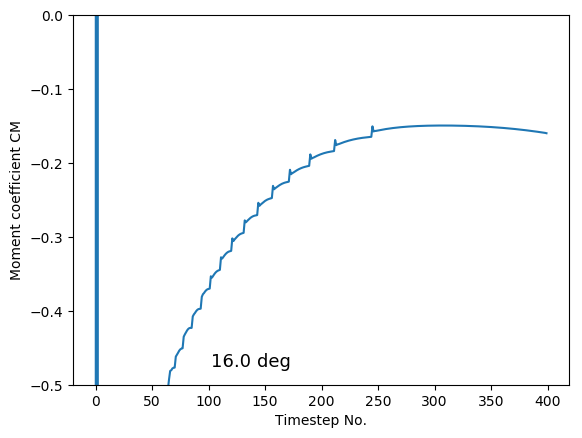

In [ ]:
for case = 1:length(alpha)
    dispall(data[:,:,case],alpha[case])
end

In [ ]:
# Load data from Xfoil
xfoil = Xfoil("xfoil_0012_CN.txt");
#LIFT COEFFICIENT
figure()
plot(alpha[1:8],data[end,6,1:8], "bo",label="LDVM_SPV")
plot(xfoil.alpha, xfoil.CL, "r", label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

#DRAG COEFFICIENT
figure()
plot(alpha,data[end,7,:], "bo",label="LDVM_SPV")
plot(xfoil.alpha, xfoil.CD, "r", label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Drag cofficient CD")
legend()

#MOMENT COEFFICIENT
figure()
plot(alpha,data[end,8,:], "bo",label="LDVM_SPV")
plot(xfoil.alpha, xfoil.CM, "r", label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Moment cofficient CM")
legend()

Drag and moments coeffcient look exceptionally good. Unfortunately, solution diverges for larger angles of attack at the moment. 